# Exploratory Data Analysis in Python

## Lesson Overview
Welcome to lesson two! Today,  we will dive into creating, describing, and visualizing dataframes by using Pandas, a Python library.  Then, we will explore two other libraries, Matplotlib and Seaborn to continue plotting our data.

By the end of this lesson you will be able to:
* Create your own dataframes
* Load csv files as dataframes
* Describe dataframes using Pandas
* Visualize dataframes using Pandas, Seaborn and Matplotlib


# Univariate Data Exploration

Although there are multiple ways to calculate these statistics, we will specifically use pandas for the following reasons:
1. Pandas by itself can calculate all the statistics in a univariate data exploration process. For other packages, we would have to mix and match
2. Pandas is data-centric, taking dataframes as inputs. In other words, pandas treats a dataframe as the main object. This is very similar to R!

## Mean

In [52]:
# Example of calculating mean

# Import pandas library
# Note that you can name the library however you want. "pd" is just a convention that we follow
import pandas as pd

# Create dataframe
raw_data = {"name" : ["A", "B", "C", "D", "E", "G"],
       "gender": ["M","F", "F", "M", "F", "F"],
       "age": [18, 20, 19, 22, 17, 19],
       "gpa": [3.9, 3.7, 3.0, 4.0, 3.3, 3.7]}

# To officially make it a pandas dataframe, we need this code
sample_data = pd.DataFrame(raw_data, columns = ["name", "gender", "age", "gpa"])

# Look at the data
sample_data


,name,gender,age,gpa
0,A,M,18,3.9
1,B,F,20,3.7
2,C,F,19,3.0
3,D,M,22,4.0
4,E,F,17,3.3
5,G,F,19,3.7


In [12]:
# Calculate mean across dataframe. axis = 0 is by column, axis = 1 is by row
# df_function = dataframe_name.function(), where function can be mean, median, mode, etc. Essentially, name the
# variable with the function name that you are using.


# If you only need mean of one column, you can specify the column to calculate. Default setting is by column
# Note: Remind students how to access a dictionary
gpa_column = sample_data["gpa"]
mean_gpa = gpa_column.mean()
print(mean_gpa)
print()

# To remove the warning message:
mean_all = sample_data.mean(numeric_only = True)
print(mean_all)
print()


age    19.166667
gpa     3.600000
dtype: float64



### Warning message explained:

We were asking Jupyter to calculate the mean of name and gender, which are categorical variables. Therefore, it raises a warning and skips through those 2 columns. To fix this, we simple tell the function mean() to only choose numeric columns in the first place.

## Median

We will use the same dataframe for consistency

In [16]:
# Calculate median across dataframe
median_all = sample_data.median(axis = 0, numeric_only = True)
print(median_all)
print()

# Calculate median of a single column
# create a sub-dataframe
gpa_df = sample_data["gpa"]
median_gpa = gpa_df.mean()
print(median_gpa)

age    19.0
gpa     3.7
dtype: float64

3.5999999999999996


## Mode
We will use the same dataframe for consistency

In [17]:
# Calculate mode across dataframe --> Notice that it will list out of values with the same mode
mode_all = sample_data.mode()
print(mode_all)
print()

# Calculate mode of a single column
mode_gender = sample_data["gender"].mode()
print(mode_gender)

  name gender   age  gpa
0    A      F  19.0  3.7
1    B    NaN   NaN  NaN
2    C    NaN   NaN  NaN
3    D    NaN   NaN  NaN
4    E    NaN   NaN  NaN
5    G    NaN   NaN  NaN

0    F
Name: gender, dtype: object


## Max, Min, and Range

We will use the same dataframe for consistency

In [20]:
# Calculate the max/min age
max_age = sample_data["age"].max()
print("Max age is:", max_age)
print()
min_age = sample_data["age"].min()
print("Min age is:", min_age)
print()

# Calculate the age range
range_age = max_age - min_age
print("The range is:", range_age)

Max age is: 22

Min age is: 17

The range is: 5


## Quantile

Have a dedicated section for quantile

## IQR: Inter Quartile Range

We will use the same dataframe for consistency.

Note that pandas doesn't have a function that calculates directly the IQR. pandas, however, provides a workaround: Calculate Q1 and Q3, then find IQR by subtracting Q1 from Q3.

In [21]:
# Calculate the quantiles of gpa
q1 = sample_data["gpa"].quantile(0.25)
q3 = sample_data["gpa"].quantile(0.75)

# Calculate the IQR of gpa
iqr = q3 - q1
print(iqr)

0.4500000000000002


## Variance 

In [23]:
import pandas as pd

# Create our raw data
my_subjects_raw = { 'subject': ['Calculus', 'Intro to music', 'Psychology', 'Sociology'],
    'grades': [4.0, 3.3, 3.9, 4.0],
    'attendance (%)': [90, 60, 78, 100],
    'participation (%)':[100, 20, 80, 92],
    'semester': ['fall', 'spring', 'spring', 'fall']}

# Transform our raw data to pandas dataframe
my_subjects_pd = pd.DataFrame(my_subjects_raw, columns = ['subject', 'grades', 'attendance (%)', 'participation (%)',
                                                         'semester'])
# Display data
my_subjects_pd

,subject,grades,attendance (%),participation (%),semester
0,Calculus,4.0,90,100,fall
1,Intro to music,3.3,60,20,spring
2,Psychology,3.9,78,80,spring
3,Sociology,4.0,100,92,fall


In [25]:
# The function var() will display a table with all the variance values for every column. To see the variance values
# of every quantitative value we can type dataframe.var()
subjects_var = my_subjects_pd.var(numeric_only = True)
print(subjects_var)

# to print the variance of only one column, we can do dataframe['nameOfColumn'].var()
# Let's try visualizing grades' variance.
subjects_gpa = my_subjects_pd['grades'].var()
print(subjects_gpa)

grades                  0.113333
attendance (%)        296.000000
participation (%)    1316.000000
dtype: float64
0.1133333333333334


## Standard Deviation

In [26]:
# dataframe.std() will display a table with all the standard deviations (quantitative variable columns)
subjects_std = my_subjects_pd.std(numeric_only = True)
print(subjects_std)

grades                0.336650
attendance (%)       17.204651
participation (%)    36.276714
dtype: float64


In [ ]:
# if we want to check only one column, we can follow the same pattern we've been using:
# dataframe.['columnName'].std()

# Let's calculate grades' standad deviation



## Correlation Coefficient 

In [28]:
sample_correlation = { 'subject id': ['0111', '9203', '2313', '4503'],
    'concerts attended': [3, 2, 10, 4],
    'shoe size': [7, 7, 7, 7.5]}

# Transform our raw data to pandas dataframe
sample_correlation_pd = pd.DataFrame(sample_correlation, columns = ['subject id', 'concerts attended', 'shoe size'])


In [30]:
# To calculate correlation we will make use of the corr() function. Again, we will follow the format dataframe.corr()

# Meanings:
# 1: Full correlation. If one variable increases, so does the other
# 0: No correlation.
# -1: Full negative correlation. If one variable increases, the other decreases.

# Let's see the correlation between concerts attended and shoe size. Should we expect a value closer to -1, 0 or 1?
sample_corr = sample_correlation_pd.corr()
print(sample_corr)


                   concerts attended  shoe size
concerts attended           1.000000  -0.139122
shoe size                  -0.139122   1.000000
Object `corr` not found.


In [32]:
# how to handle more columns? 

Object `corr` not found.


In [ ]:
# Let's check another example!
sample_correlation = { 'subject id': ['0111', '9203', '2313', '4503'],
    'class attendance (%)': [99, 65, 100, 45],
    'GPA': [4.0, 3.2, 3.8, 2.9]}

# Transform our raw data to pandas dataframe
sample_correlation_pd = pd.DataFrame(sample_correlation, columns = ['subject id', 'class attendance (%)', 'GPA'])

## Describing dataframes

In [ ]:
# In order to get an idea of our data more quickly we can make use of three different methods.

# To look at the first few rows of a data frame we can do dataframe.head() , similarly to take a look at the
# last few rows we can type dataframe.tail() . This will come handy when we are dealing with big dataframes

In [33]:
# We can also display a data summary by typing my_subjects_pd.describe()
# This will show counts, mean, std, min, 25%, 50%, 75%, and max.

my_subjects_pd.describe()


,grades,attendance (%),participation (%)
count,4.00000,4.000000,4.000000
mean,3.80000,82.000000,73.000000
std,0.33665,17.204651,36.276714
min,3.30000,60.000000,20.000000
25%,3.75000,73.500000,65.000000
50%,3.95000,84.000000,86.000000
75%,4.00000,92.500000,94.000000
max,4.00000,100.000000,100.000000


In [35]:
# Sometime, we will encounter missing data in our dataframes. To get a sense of how many values are missing we can
# type dataframe.isnull().sum()

# explain with other examples

my_subjects_pd.isnull().sum()

subject              0
grades               0
attendance (%)       0
participation (%)    0
semester             0
dtype: int64

In [36]:
sample_data.describe()

,age,gpa
count,6.000000,6.000000
mean,19.166667,3.600000
std,1.722401,0.379473
min,17.000000,3.000000
25%,18.250000,3.400000
50%,19.000000,3.700000
75%,19.750000,3.850000
max,22.000000,4.000000


# Data Visualization
Now that we have grasped how to summarize our data, let's try plotting it! In this section, we will introduce you to how to create graphs using the python libraries Matplotlib, pandas, and Seaborn. When building data visualizations, our first step is always to import the necessary libraries. Although you only need to load a library once per Jupyter notebook, throughout this handout we will always load libraries before every plot just so we can get into the practice of doing so. 

After loading our libraries, we will need to either gather our data or create our data. In this handout, we will teach how to import data from a .csv file and how to create lists of data for our plots. Finally, we will learn how and what functions to use to create our graph of choice, and how to label and color our plots.

## Matplotlib
### Line Graph

Let's begin by making a single line plot!

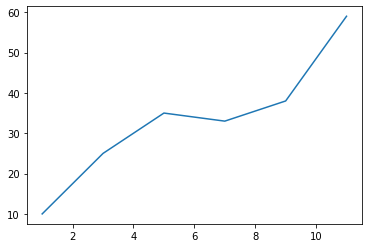

In [37]:
# Load libraries
import matplotlib.pyplot as plt

# Create data
x = [1, 3, 5, 7, 9, 11]
y = [10, 25, 35, 33, 38, 59]

# Plot data
plt.plot(x, y)

# Display plot
plt.show()

Great job! Now let us continue to add more details to our graph. In the matplotlib module, we can add a title to our graph by writing plt.title() and add labels using plt.xlabel for the x-axis and plt.ylabel for the y-axis. Additionally, we can color our line by assigning color within our plt.plot() function.

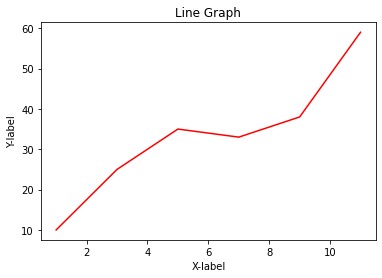

In [41]:
# Load libraries
import matplotlib.pyplot as plt

# Create data
x = [1,3,5, 7, 9, 11]
y = [10, 25, 35, 33, 38, 59]

# Plot data and add color
plt.plot(x, y, color = "red")

# Add label for the x-axis
plt.xlabel("X-label")

# Add label for the y-axis
plt.ylabel("Y-label")

# Add a title to the graph
plt.title("Line Graph")

# Display plot
plt.show()

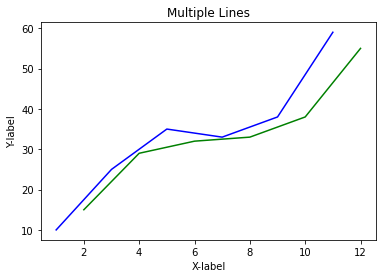

In [42]:
# Load libraries
import matplotlib.pyplot as plt

# Create the first set of data
x = [1,3,5, 7, 9, 11]
y = [10, 25, 35, 33, 38, 59]

# Plot first set and color it
plt.plot(x, y, color = "blue")

# Create the second set of data
x = [2,4,6,8,10,12]
y = [15, 29, 32, 33, 38,55]

# Plot second set and color it
plt.plot(x, y, color = "green")

# Add label for the x-axis
plt.xlabel("X-label")

# Add label for the y-axis
plt.ylabel("Y-label")

# Add a title to the graph
plt.title("Multiple Lines")

# Display the graph
plt.show()

Given that we now have multiple lines on our line graph, it would be helpful to have a legend that distinguishes between the two lines. Luckily, we can use legend() and add some code to our plotting functions to create the legend labels.

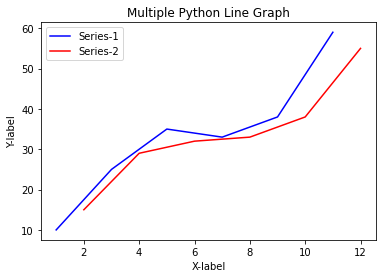

In [18]:
# Load libraries
import matplotlib.pyplot as plt

# Create the first set of data
x = [1,3,5, 7, 9, 11]
y = [10, 25, 35, 33, 38, 59]

# Plot first set and color it
plt.plot(x, y, label = , color = 'blue')

# Create the second set of data
x = [2,4,6,8,10,12]
y = [15, 29, 32, 33, 38,55]

# Plot second set and color it
plt.plot(x, y, label = , color = 'red')

# Add label for the x-axis
plt.xlabel("X-label")

# Add label for the y-axis
plt.ylabel("Y-label")

# Add a title to the graph
plt.title("Multiple Python Line Graph")

# Add a legend to the graph


# Display the graph
plt.show()

### Scatter plot

Scatter plots are another helpful way to visualize data in statistics, and we can use most of the skills we just mastered to learn how to make them!

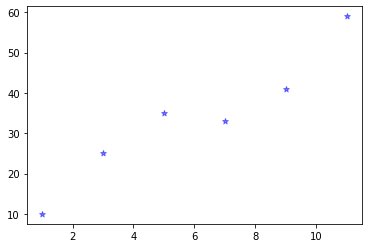

In [46]:
# As always, load libraries
import matplotlib.pyplot as plt

# Create the data
x = [1,3,5,7,9,11]
y = [10,25,35,33,41,59]

# Draw the scatter plot
plt.scatter(x, y, c = "blue", marker = "*", alpha = 0.5)

# Add x-axis and y-axix labels
plt.xlabel("")
plt.ylabel("")

# Add a title
plt.title("")

# Display the graph
plt.show()

### Pie plot

We can follow a similar process to create pie plots which are great for visualizing proportions of a whole. The method pie() will help us create these graphs.

ValueError: could not convert string to float: 'M'

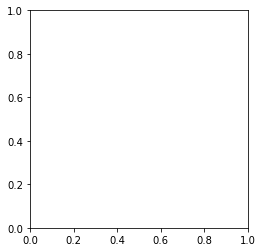

In [55]:
# Add libraries
import matplotlib.pyplot as plt

# Create data
courses = ["Intro Stats", "Theoretical Statistics", "Data Science", "Probability"]
scores = [78, 89, 100, 65]

# Plot the data
plt.pie(sample_data["gender"],
       startangle = 90,
       shadow = True,
       autopct = '%1.1f%%')

# Add title
plt.title("Statistics Student Performance")

# Display the chart
plt.show()

### Bar plot
Bar plots are another helpful data visualization that statisticians use to compare the values of various groups. Bar plots can be both vertical and horizonatal, so let's practice making them both ways!

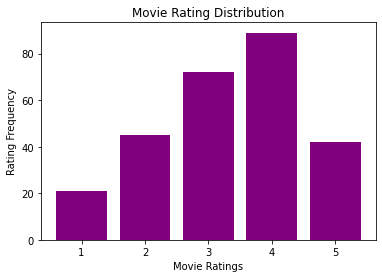

In [35]:
# Add libraries
import matplotlib.pyplot as plt

# Create data
movie_ratings = [1,2,3,4,5]
rating_counts = [21,45,72,89,42]

# Plot the data
# The bar function requires at least an x value and a y value


# Add axis labels
plt.xlabel("Movie Ratings")
plt.ylabel("Rating Frequency")

# Add a title
plt.title("Movie Rating Distribution")

# Display the plot
plt.show()

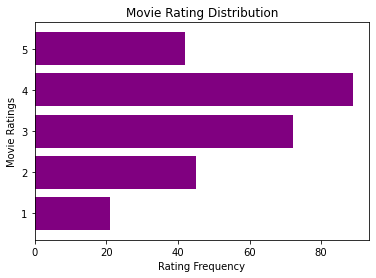

In [36]:
# Add libraries
import matplotlib.pyplot as plt

# Create data
movie_ratings = [1,2,3,4,5]
rating_counts = [21,45,72,89,42]

# Plot the data
# The barh function requires at least an x value and a y value


# Add axis labels
plt.xlabel("Rating Frequency")
plt.ylabel("Movie Ratings")

# Add a title
plt.title("Movie Rating Distribution")

# Display the plot
plt.show()

### Histogram plot

Histograms are a common way to visualize the distribution of a single numeric variable. Furthermore, it shows the probability distribution of a continuous variable, so we will certainly need to use these in our statistical analysis. Let's see how to make histograms using the hist( ) method.

Here we will need to specify the data, bins, and relative width within our histogram function. Our bins will go from 20 to 60 with a 10 years bin size. Additionally, we are using a relative bar width of 0.6, but it is up to you whether or not to haev a thicker and thinner width for the histogram bars.

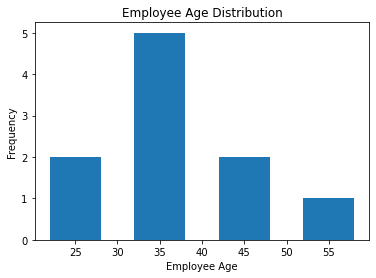

In [37]:
# Add libraries
import matplotlib.pyplot as plt

# Create data
employee_age = [21,28,32,34,35,35,37,42,47,55]

# Create bins for histogram
bins = [20,30,40,50,60]

# Plot the histogram


# Label axis
plt.xlabel("Employee Age")
plt.ylabel("Frequency")

# Add title
plt.title("Employee Age Distribution")

# Display the graph
plt.show()

# Pandas plotting

We can directly plot pandas data frames by using the plot( ) method. Inside the parenthesis we can include a wide variety of parameters, but we will be mainly using the following:

* **kind** : (String) Used to indicate the type of graph. Line, hist, box, density, scatter, etc.
* **x** : (String) Name of the column to be used.
* **y** : (String) Name of the coumn to be used.
* **figsize** = (Tuple) Used to indicate the size (width, height).
* **title** = (String) Defines the graph's title.
* **color** = (String) Indicates the graph's color.
* **xlabel** = (String) Indicates the x axis' title.
* **ylabel** = (String) Indicates the y axis' title.


In [79]:
# Let's create a new dataframe

sample_monthly_stats = {'month': ['jun', 'jul', 'aug', 'sept', 'oct'],
    'temperature (celsius)': [29, 30, 27, 26, 22],
    'rain probability (%)': [31, 40, 33, 15, 19]}

sample_monthly_stats_pd = pd.DataFrame(sample_monthly_stats, columns = ['month', 'temperature (celsius)', 'rain probability (%)'])

# Let's check how it looks

,month,temperature (celsius),rain probability (%)
0,jun,29,31
1,jul,30,40
2,aug,27,33
3,sept,26,15
4,oct,22,19


### Line plot

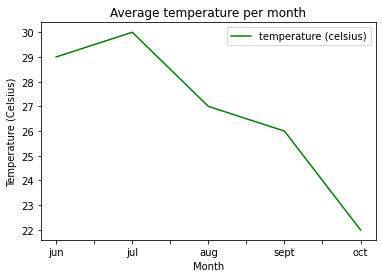

In [81]:
import matplotlib.pyplot as plt

# Let's add our parameters inside plot(). Note that the order does not matter.
sample_monthly_stats_pd.plot(title = 'Average temperature per month', kind = 'line', x = 'month',
                             y = 'temperature (celsius)', color = 'green', xlabel = 'Month',
                             ylabel = 'Temperature (Celsius)')

# As a good practice, we will continue making use of matplotlib.pyplot's function show() to display our graph.
# However, due to Jupyter being interactive, just by making use of plot() we will be able to see our graph. 



### Scatter Plot

In [57]:
# Let's import a csv file to continue doing some plotting. To do so, we are going to use pandas' function read_csv().
import pandas as pd 
who_data = 

# We can look at the first 5 rows by using head()


,Country,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total
0,Afghanistan,1,1,151.0,28.0,NaN,NaN,NaN,26088.0
1,Albania,2,2,27.0,98.7,6000.0,93.0,94.0,3172.0
2,Algeria,3,3,6.0,69.9,5940.0,94.0,96.0,33351.0
3,Andorra,4,2,NaN,NaN,NaN,83.0,83.0,74.0
4,Angola,5,3,146.0,67.4,3890.0,49.0,51.0,16557.0


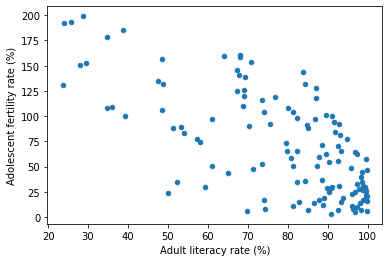

In [75]:
# We will use plot() again, and change the desired parameters



### Density

<AxesSubplot:ylabel='Density'>

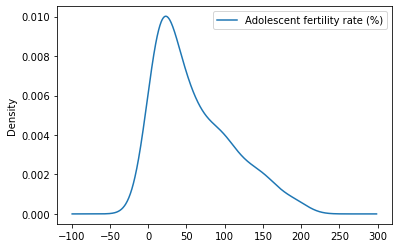

In [82]:
# Let's change kind to make a density plot.


In [84]:
# We can verify that the mean of the Adolescent fertility rate (%) is near 50 by using what we learned before.


46.0

###  Box plot

<AxesSubplot:>

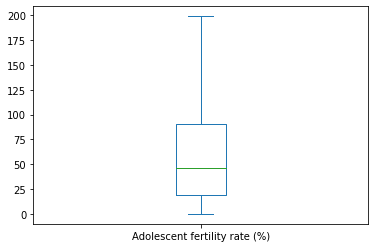

In [90]:
# Let's change kind to make a box plot.


In [92]:
# We can verify our graph by using describe(). Does the plot make sense?


count    177.000000
mean      59.457627
std       49.105286
min        0.000000
25%       19.000000
50%       46.000000
75%       91.000000
max      199.000000
Name: Adolescent fertility rate (%), dtype: float64

### Histogram

<AxesSubplot:ylabel='Frequency'>

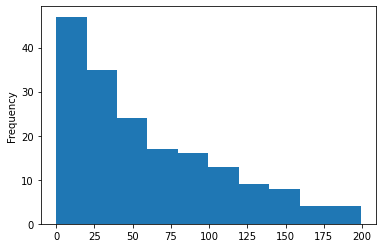

In [99]:
# For histograms, we can specify a column right after the dataframe by doing dataframe[columnName]

# Note that pandas will do automatically choose our bins if not specified.


<AxesSubplot:ylabel='Frequency'>

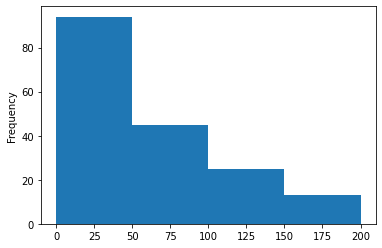

In [100]:
# Let's change the number of bins by adding the bins parameter
who_data['Adolescent fertility rate (%)'].plot(kind = 'hist', )
plt.show()

## Seaborn
The Seaborn library can help us to make more advanced statistical plots. Seaborn is an open source Python library and uses Matplotlib as a baselibrary to produce interactive and attractive data visualizations.

### lm plots
The lm plot displays the scattered data and fits a regression model onto it. It is exactly the same as putting the line of best fit onto our graph, and this process helps to understand the relationship between two variables. The method lmplot( ) takes the input of two column names (x and y) as a string and a DataFrame variable, and by default, fits the regression line. Let's try it out!

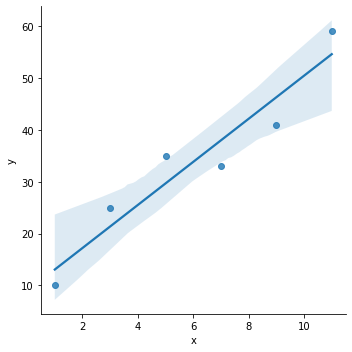

In [38]:
# Add libraries


# Create DataFrame using pandas
df = pd.DataFrame({'x':[1,3,5,7,9,11],
                  'y':[10,25,35, 33,41,59]})

# Create the plot


# Display the plot
plt.show()

If we wanted to remove the regression line, we can set the parameter fig_reg to False within the lmplot( ) method.

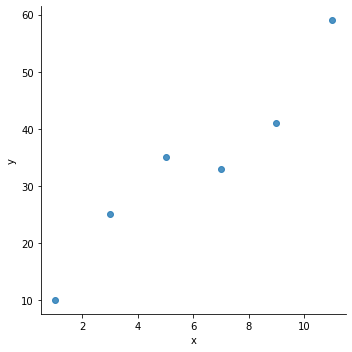

In [39]:
# Add libraries


# Create DataFrame using pandas
df = pd.DataFrame({'x':[1,3,5,7,9,11],
                  'y':[10,25,35, 33,41,59]})
# Create the plot


# Display the plot


### Bar plots

We can also use seaborn to make more bar plots with advanced details. The bar() function intakes two columns (x and y) and a DataFrame, and outputs a colorful bar plot by default. Let's see an example!

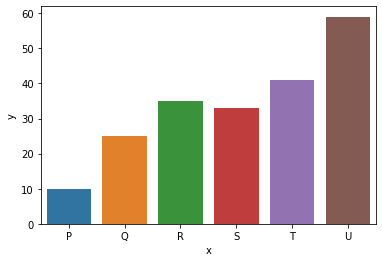

In [41]:
# Add libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame
df = pd.DataFrame({'x': ['P','Q','R','S','T','U'],
                  'y': [10,25,35,33,41,59]})

# Create bar plot


# Display the plot
plt.show()

### Distribution plots
To plot a univariate distribution of variables, we can make distribution plots with Seaborn. These figures combine a histogram with a default bin size and a Kernel Density Estimation (KDE) plot. Using a dataset of HR Analytics made available in the code repository for Python Data Analysis - Third Edition, published by Packt let's try to make a distribution plot! The quantitative variable we will investigate is satisfaction_level, which is the employee's satisfaction level in a company.

/Users/angelicasang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


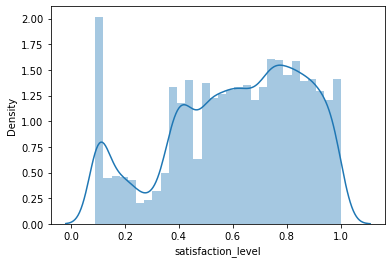

In [46]:
# Add libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame using pandas


# Create a distribution plot


# Display the plot


# NOTE: A warning will appear because the function `distplot` will be removed in the future from seaborn.
# Try on your own to see what happens when we change `distplot` to `histplot` or to `displot`.

### Box plot
Box plots, or box-and-whisker plots, are another helpful visualization to understand the distribution of our data. Let's practice making a box plot in Seaborn using the same dataset from our previous example!

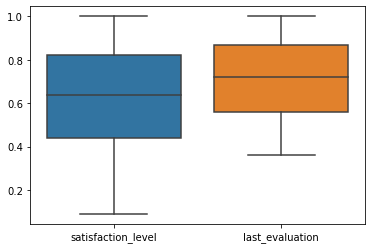

In [1]:
# Add libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame using pandas
# We also do not need to create our dataframe more than once in a Jupyter notebook. 
# For the sake of practice, we'll do it again!
df = pd.read_csv("HR_comma_sep.csv")

# Create a box plot for the variables 'satisfaction_level' and 'last_evaluation'


# Display the plot
plt.show()

# Summary

In this section, you have learned how to calculate some basic summary statistics, as well as how to create common plots. They will serve you well as you explore data 

# Tips

As you practice the skills learned in this section, please keep in mind the following suggestions:
+ Always remember to load the necessary libraries.
+ Name your variables, dataframes, and labels with helpful and informative titles.
+ If you get stuck, use the help documentation that you learned in our previous lecture to help you troubleshoot!

# References

Navlani, Avinash, Armando Fandango, and Ivan Idris. 2021. Python Data Analysis. Third Edition. Birmingham: Packt Publishing.

Python Data Analysis - Third Edition. (2019). Jupyter Notebook. Packt. https://github.com/PacktPublishing/Python-Data-Analysis-Third-Edition/blob/e1cd8029a1830fe5ecc86379ab361d215e71f036/Chapter05/HR_comma_sep.csv. Accessed July 7, 2022.

